#Question Definition

#Objectives
###Main objective
* Determine how bluecars are used.
###Specific objectives
* Determine bluecar number taken and returned over the weekend from postal code 95100
* Compare the probabilty of bluecars being returned or taken over the weekend from 95100 postal code
* Determine the relationship between the categorical and numerical data.


#Metric for success
Establishing the difference in probablity between the cars taken and returned during the weekend at the postal code 95100


#Context
With the increase in usage of electric cars, it is important from an economical standpoint to understand the usage of electrical cars. We will study the cluecar which is the most popular electrical car because from it we can gain statistical insight to the other electrical cars.

#Appropriateness of data
The data from the dataset was appropriate because it provided information that was useful in the analysis of the bluecar usage in different postal codes.

# Importing libraries

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [26]:
#loading dataset
url='http://bit.ly/DSCoreAutolibDataset'
autolib=pd.read_csv(url)
autolib.head()


,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [27]:
#loading the data glosary
glossary=pd.read_excel('columns_explanation.xlsx')
glossary

,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend
5,BlueCars_taken_sum,Number of bluecars taken that date in that area
6,BlueCars_returned_sum,Number of bluecars returned that date in that ...
7,Utilib_taken_sum,Number of Utilib taken that date in that area
8,Utilib_returned_sum,Number of Utilib returned that date in that area
9,Utilib_14_taken_sum,Number of Utilib 1.4 taken that date in that area


In [28]:
#renaming column names
autolib.rename(columns = {'n_daily_data_points': 'daily_data_points','dayofWeek':'day_of_the_week', 'Postal code':'postal_code'},inplace = True)
autolib.columns

Index(['postal_code', 'date', 'daily_data_points', 'dayOfWeek', 'day_type',
       'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum',
       'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum',
       'Slots_freed_sum', 'Slots_taken_sum'],
      dtype='object')

In [29]:
#Changing the column names to lowercase
autolib.columns = autolib.columns.str.lower()
autolib.columns

Index(['postal_code', 'date', 'daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

#Checking for outliers

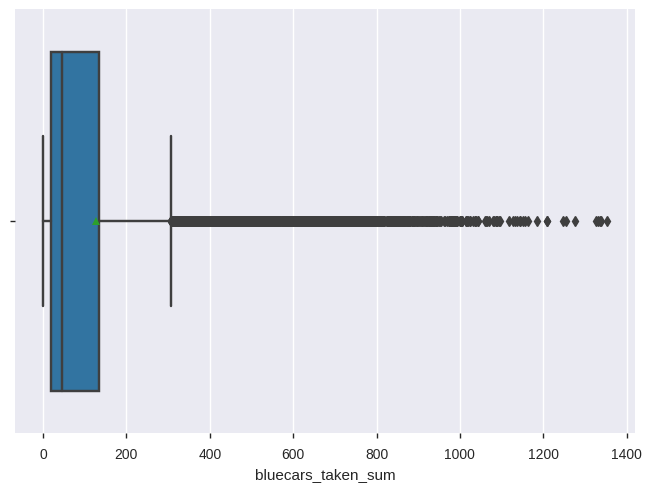

In [30]:
sns.boxplot(autolib['bluecars_taken_sum'],showmeans = True)

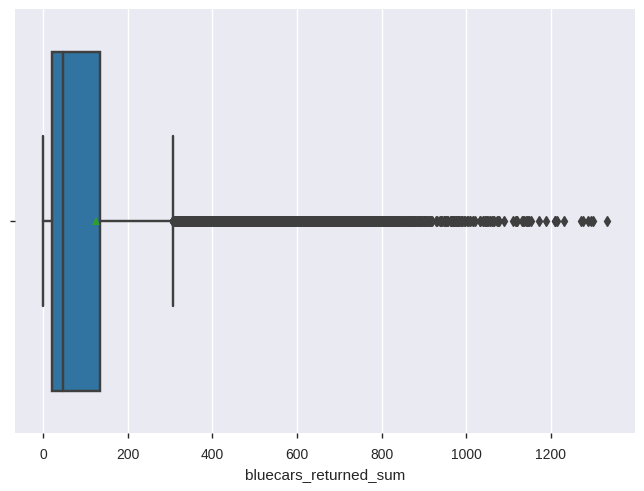

In [31]:
sns.boxplot(autolib['bluecars_returned_sum'],showmeans = True)

#Profiling the dataset

In [32]:
#using pandas profiling to get the info on the dataset
import pandas_profiling as pp
pp.ProfileReport(autolib)

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,13
Number of observations,16085
Total Missing (%),0.0%
Total size in memory,1.6 MiB
Average record size in memory,104.0 B
Numeric,5
Categorical,2
Boolean,0
Date,0
Text (Unique),0
Rejected,6


#Univariate analysis

In [33]:
#determining the frequency of the postal codes
autolib.postal_code.value_counts()

94130    156
92310    156
78140    156
94700    156
95100    156
        ... 
93150    151
93370    149
92340    147
93200    126
93390     84
Name: postal_code, Length: 104, dtype: int64

In [34]:
#determining the frequency of dates
autolib.date.value_counts()

5/27/2018    104
6/12/2018    104
6/4/2018     104
2/23/2018    104
5/31/2018    104
            ... 
1/22/2018    102
3/27/2018    102
3/14/2018    101
2/24/2018     98
6/19/2018     94
Name: date, Length: 156, dtype: int64

In [0]:
autolib.dayofweek = autolib.dayofweek.astype('object')
autolib.postal_code = autolib.postal_code.astype('object')

In [36]:
#checking the statistics summary of the numerical data
autolib.describe()

,daily_data_points,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,1431.330619,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,33.212050,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1439.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,1440.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,1440.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,1440.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


In [37]:
autolib.kurt()

postal_code               -0.542143
daily_data_points         36.594846
dayofweek                 -1.260994
bluecars_taken_sum         6.172692
bluecars_returned_sum      6.186288
utilib_taken_sum           7.702362
utilib_returned_sum        7.936357
utilib_14_taken_sum        7.186815
utilib_14_returned_sum     7.185463
slots_freed_sum            6.454514
slots_taken_sum            6.442553
dtype: float64

In [38]:
autolib.skew()

postal_code              -1.168778
daily_data_points        -5.742776
dayofweek                 0.018824
bluecars_taken_sum        2.406355
bluecars_returned_sum     2.412085
utilib_taken_sum          2.556872
utilib_returned_sum       2.578665
utilib_14_taken_sum       2.510924
utilib_14_returned_sum    2.511488
slots_freed_sum           2.597406
slots_taken_sum           2.596904
dtype: float64

#Bivariate Analysis



###1. Numerical variables
Checking for correlations between the numerical variables

In [39]:
autolib.corr()


,daily_data_points,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
daily_data_points,1.000000,0.029411,0.030063,0.022669,0.023322,0.025738,0.026351,0.020873,0.021169
bluecars_taken_sum,0.029411,1.000000,0.998660,0.893833,0.892850,0.940946,0.940757,0.948575,0.947996
bluecars_returned_sum,0.030063,0.998660,1.000000,0.893613,0.893268,0.940542,0.941117,0.948258,0.948771
utilib_taken_sum,0.022669,0.893833,0.893613,1.000000,0.981982,0.847519,0.846304,0.853760,0.853049
utilib_returned_sum,0.023322,0.892850,0.893268,0.981982,1.000000,0.845645,0.845306,0.852939,0.852936
utilib_14_taken_sum,0.025738,0.940946,0.940542,0.847519,0.845645,1.000000,0.992062,0.899232,0.898719
utilib_14_returned_sum,0.026351,0.940757,0.941117,0.846304,0.845306,0.992062,1.000000,0.899442,0.899777
slots_freed_sum,0.020873,0.948575,0.948258,0.853760,0.852939,0.899232,0.899442,1.000000,0.999221
slots_taken_sum,0.021169,0.947996,0.948771,0.853049,0.852936,0.898719,0.899777,0.999221,1.000000


There is a strong positive correlation between teh numerical variables seeing as the correlations between them is very close to 1.

#Sampling



In [40]:
#Selecting cars used during weekend and at the postal code 95100

bluecar_sample = autolib[(autolib['day_type'] == 'weekend') & (autolib['postal_code'] == 95100)]
bluecar_sample.head()

,postal_code,date,daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
15622,95100,1/6/2018,1437,5,weekend,25,30,0,0,0,0,0,0
15623,95100,1/7/2018,1440,6,weekend,23,18,0,0,0,0,0,0
15629,95100,1/13/2018,1440,5,weekend,31,41,2,1,3,1,0,0
15630,95100,1/14/2018,1440,6,weekend,32,26,0,0,1,1,0,0
15636,95100,1/20/2018,1439,5,weekend,29,26,0,0,2,2,0,0


In [41]:
#confirm the shape of dataframe
bluecar_sample.shape

(44, 13)

In [42]:
#Number of bluecars taken at the 95100 postal code during the weekend
 bluecar_sample.groupby(['postal_code'])['bluecars_taken_sum'].sum()


postal_code
95100    1500
Name: bluecars_taken_sum, dtype: int64

In [43]:
#Number of bluecars return at the 95100 postal code during the weekend
 bluecar_sample.groupby(['postal_code'])['bluecars_returned_sum'].sum()


postal_code
95100    1412
Name: bluecars_returned_sum, dtype: int64

In [44]:
#average number of bluecars returned over the weekend
returned_avg_bluecar = bluecar_sample.groupby(['postal_code'])['bluecars_returned_sum'].mean()

returned_avg_bluecar

postal_code
95100    32.090909
Name: bluecars_returned_sum, dtype: float64

In [45]:
#average bluecars borrowed over the weekend
taken_avg_bluecar = bluecar_sample.groupby(['postal_code'])['bluecars_taken_sum'].mean()

taken_avg_bluecar

postal_code
95100    34.090909
Name: bluecars_taken_sum, dtype: float64

In [0]:
## import useful poisson library

from scipy.stats import poisson


In [47]:
# Determining the Probability(pmf) of bluecars being taken in one weekend

events = 44
time = 2
time_period = 1


lambda_ = ((events/time)*time_period)

mean = taken_avg_bluecar

poisson.pmf(lambda_,mean)

array([0.00727426])

In [48]:
# Determining the Probability(pmf) of bluecars being returned in one weekend
events = 44
time = 2
time_period = 1


lambda_ = ((events/time)*time_period)

mean = returned_avg_bluecar

poisson.pmf(lambda_,mean)

array([0.01421455])

##Results
* Probability of bluecars being taken = 0.00727426
* Probability of bluecars being returned = 0.01421455

Since the probability of bluecar being returned is greater than the probability of the bluecar being taken, we reject the null hypothesis which states that the probability of the bluecar being taken is greater or equal to the probability of the bluecar being returned.


The poisson distribution shows that the probability of blue_cars taken (2.04243515e-38) is less than the probability of bluecars returned(5.16128439e-39) in a weekend.We can fail to accept the null hypothesis and accept the alternative hypothesis because there is not enough evidence to accept the null hypothesis.

#Conclusion

* Since the number of bluecars being returned in this postal code is higher than those taken, the company can look into the reason for the low number of bluecars being taken provide a solution to improve usage.